# 今回の課題：条件分岐・ループ編

課題に取り組むにあたって、こちらの記事を読んでおくとヒントが落ちているかもしれません！


https://qiita.com/kobayu0902art/items/1e4007102a7a564f3b58

また、今回の課題ではAtcoderの問題を使用していますが、問題の詳細は問題タイトルのリンクをクリックしてください。

Q1.

PokemonStatus_Gen8.csvから

[0,3,5,17,21,25,46,57,79,100,101]

上記の図鑑番号に対応するポケモンの名前を列挙しよう

出力例：
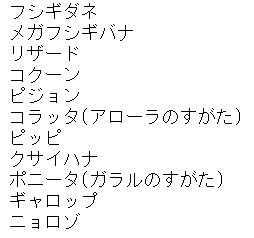

A1.

In [2]:
import pandas as pd

df=pd.read_csv('PokemonStatus_Gen8.csv').set_index("ポケモン名" , drop = False)

for i in [0,3,5,17,21,25,46,57,79,100,101]:
    print(df.loc[df.index[i],'ポケモン名'])

フシギダネ
メガフシギバナ
リザード
コクーン
ピジョン
コラッタ(アローラのすがた)
ピッピ
クサイハナ
ニョロゾ
ポニータ(ガラルのすがた)
ギャロップ


Q2.

l = [1231231,2342,423,14234,123,41234,123412341,2341,254,656745,672346,134763,45123,5467,456234,134523,927834,4235,245,3463,246,7547,32356357,235,63754,423456,57458,347845,6234657,2356]

上記リストの中で、

- 偶数
- 奇数
- 7の倍数
- 19の倍数


がいくつあるかそれぞれカウントしてください。

A2.

In [3]:
l = [1231231,2342,423,14234,123,41234,123412341,2341,254,656745,672346,134763,45123,5467,456234,134523,927834,4235,245,3463,246,7547,32356357,235,63754,423456,57458,347845,6234657,2356]

#回答ここから～～
c1,c2,c3,c4=0,0,0,0

for i in l:
    if i%2 == 0:
        c1+=1
    if i%3 == 1:
        c2+=1
    if i%7 == 0:
        c3+=1
    if i%19 == 0:
        c4+=1

print('偶数:'+str(c1)+'\n奇数:'+str(c2)+'\n7の倍数:'+str(c3)+'\n19の倍数:'+str(c4))

偶数:12
奇数:10
7の倍数:3
19の倍数:1


Q3.
2020年1月1日から2050年12月31日までの日付を8桁の数字で表現したyyyyMMdd(例:20201205)について、以下の条件を満たすものが何個あるか数え、列挙してください。

- 左右対称なもの
- 各桁の数字の和が[0,1,8]のいずれかであるもの

A3.

日付リスト作成 参考:https://qiita.com/YuukiMiyoshi/items/42a890a95af6ab7a5348

In [4]:

# 使用するモジュールのインポート
from datetime import datetime as dt
from datetime import timedelta

# 日付条件の設定
strdt = dt.strptime("2020-01-01", '%Y-%m-%d')  # 開始日
enddt = dt.strptime("2050-12-31", '%Y-%m-%d')  # 終了日

# 日付差の日数を算出（リストに最終日も含めたいので、＋１しています）
days_num = (enddt - strdt).days + 1  # （参考）括弧の部分はtimedelta型のオブジェクトになります

datelist = []
for i in range(days_num):
    datelist.append(strdt + timedelta(days=i))
str_datelist = []
for d in datelist:
    str_datelist.append(str(d.strftime("%Y-%m-%d")).replace('-',''))

# 確認用
# for i in str_datelist:
#     print(i)

左右対称なもの

In [5]:
l = list(str_datelist[0])
l

['2', '0', '2', '0', '0', '1', '0', '1']

In [6]:
s=0
l=[]
for d in str_datelist:
    l_d=list(d)
    if l_d[0]==l_d[7] and l_d[1]==l_d[6] and l_d[2]==l_d[5] and l_d[3]==l_d[4]:
        s+=1
        l.append(d)
print(s)
print(l)

5
['20200202', '20211202', '20300302', '20400402', '20500502']


各桁の数字の和が[0,1,8]のいずれかであるもの

In [8]:
s=0
l=[]
for i in str_datelist:
  str_list = list(i)
  int_list = []
  n_sum=0
  for n in str_list:
    n_sum=n_sum+int(n)
  if n_sum == 8 or n_sum == 1 or n_sum == 0:
    s+=1
    l.append(i)
print(s)
print(l)

50
['20200103', '20200112', '20200121', '20200130', '20200202', '20200211', '20200220', '20200301', '20200310', '20201003', '20201012', '20201021', '20201030', '20201102', '20201111', '20201120', '20201201', '20201210', '20210102', '20210111', '20210120', '20210201', '20210210', '20211002', '20211011', '20211020', '20211101', '20211110', '20220101', '20220110', '20221001', '20221010', '20300102', '20300111', '20300120', '20300201', '20300210', '20301002', '20301011', '20301020', '20301101', '20301110', '20310101', '20310110', '20311001', '20311010', '20400101', '20400110', '20401001', '20401010']


Q4.[ABC 087 B - Coins](https://atcoder.jp/contests/abc087/tasks/abc087_b)

問題文

あなたは、
500
 円玉を 
A
 枚、
100
 円玉を 
B
 枚、
50
 円玉を 
C
 枚持っています。 これらの硬貨の中から何枚かを選び、合計金額をちょうど 
X
 円にする方法は何通りありますか。

同じ種類の硬貨どうしは区別できません。2 通りの硬貨の選び方は、ある種類の硬貨についてその硬貨を選ぶ枚数が異なるとき区別されます。

入力例

A

B

C

X

----------

2

2

2

100

----------

出力例

2

A4.

In [71]:
#A,B,C,X=int(input()),int(input()),int(input()),int(input())
A,B,C,X=2,2,2,100

c_A,c_B,c_C=0,0,0

制約
0
≤
A
,
B
,
C
≤
50
A
+
B
+
C
≥
1
50
≤
X
≤
20
,
000
A
,
B
,
C
 は整数である
X
 は 
50
 の倍数である

In [11]:
#A,B,C,X = int(input()),int(input()),int(input()),int(input())
A,B,C,X = 30,40,50,6000
counter=0

for A_i in range(A+1):
  for B_i in range(B+1):
    for C_i in range(C+1):
      #print('A:'+str(A_i)+'  B:'+str(B_i)+'  C:'+str(C_i))
      if (500*A_i)+(100*B_i)+(50*C_i)==X:
        #print('A:'+str(A_i)+'  B:'+str(B_i)+'  C:'+str(C_i))
        counter=counter+1
counter

213

##### Q5.[ABC 083 B - Some Sums](https://atcoder.jp/contests/abc083/tasks/abc083_b)

問題文

1
 以上 
N
 以下の整数のうち、
10
 進法での各桁の和が 
A
 以上 
B
 以下であるものの総和を求めてください。

A5.

In [12]:
N,A,B=20,2,5
for i in range(1,N+1):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [13]:
test_list=list('18')
test_list

['1', '8']

In [14]:
#各桁の和
test_list=list('1234')
l_sum=0
for i in test_list:
    l_sum=l_sum+int(i)
l_sum

10

N,A,B=20,2,5の場合、20
 以下の整数のうち、各桁の和が 
2
 以上 
5
 以下なのは 
2
,
3
,
4
,
5
,
11
,
12
,
13
,
14
,
20
 です。これらの合計である 
84
 を出力します。



In [15]:
N,A,B=20,2,5
s=0
for n in range(1,N+1):
    str_n=str(n)
    l=list(str_n)
    l_sum=0
    for i in l:
        l_sum=l_sum+int(i)
    if A<=l_sum<=B:
        print(n)
        s=s+n
s

2
3
4
5
11
12
13
14
20


84

In [17]:
N,A,B=int(input()),int(input()),int(input())
s=0
for n in range(1,N+1):
    str_n=str(n)
    l=list(str_n)
    l_sum=0
    for i in l:
        l_sum=l_sum+int(i)
    if A<=l_sum<=B:
        s=s+n
s

100
4
16


4554